In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes: ", K)

number of classes:  10


In [19]:
x_train[0].shape

(32, 32, 3)

In [6]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
______________________________________________

In [7]:
# Compile and fit
# Note: make sure you are using hte GPU for this!
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

result = model.fit(x_train, y_train,
                  validation_data=(x_test, y_test),
                  epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 24s 489us/sample - loss: 1.5146 - acc: 0.4510 - val_loss: 1.2354 - val_acc: 0.5544
Epoch 2/10
50000/50000 [==============================] - 24s 486us/sample - loss: 1.1820 - acc: 0.5781 - val_loss: 1.1000 - val_acc: 0.5995
Epoch 3/10
50000/50000 [==============================] - 24s 481us/sample - loss: 1.0259 - acc: 0.6337 - val_loss: 1.0176 - val_acc: 0.6339
Epoch 4/10
50000/50000 [==============================] - 24s 484us/sample - loss: 0.9091 - acc: 0.6777 - val_loss: 0.9388 - val_acc: 0.6662
Epoch 5/10
50000/50000 [==============================] - 24s 473us/sample - loss: 0.8130 - acc: 0.7099 - val_loss: 0.8953 - val_acc: 0.6889
Epoch 6/10
50000/50000 [==============================] - 24s 478us/sample - loss: 0.7319 - acc: 0.7397 - val_loss: 0.8732 - val_acc: 0.6956
Epoch 7/10
50000/50000 [==============================] - 24s 473us/sample - loss: 0.6563 - acc: 0.7673 

In [14]:
# Fit with data augmentation
# Node: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

print(x_train.shape[0])
print(x_train.shape[0] // batch_size)

50000
1562


In [18]:
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epochs = x_train.shape[0] // batch_size
result = model.fit_generator(train_generator,
                            validation_data=(x_test, y_test),
                            steps_per_epoch=steps_per_epochs,
                            epochs=10)

Epoch 1/10
1562/1562 [==============================] - 34s 22ms/step - loss: 1.0108 - acc: 0.6481 - val_loss: 0.8432 - val_acc: 0.7065
Epoch 2/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.9441 - acc: 0.6677 - val_loss: 0.8336 - val_acc: 0.7137
Epoch 3/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.9188 - acc: 0.6774 - val_loss: 0.8241 - val_acc: 0.7124
Epoch 4/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.9014 - acc: 0.6849 - val_loss: 0.8264 - val_acc: 0.7132
Epoch 5/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.8765 - acc: 0.6911 - val_loss: 0.8094 - val_acc: 0.7216
Epoch 6/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.8614 - acc: 0.6987 - val_loss: 0.7842 - val_acc: 0.7317
Epoch 7/10
1562/1562 [==============================] - 34s 22ms/step - loss: 0.8508 - acc: 0.7025 - val_loss: 0.7832 - val_acc: 0.7293
Epoch 8/10
1562/1562 [==========================

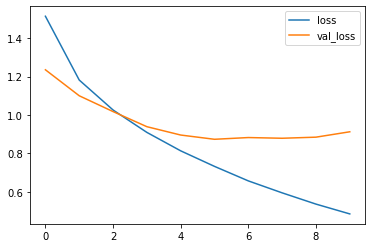

In [15]:
# Plot loss per iteration
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

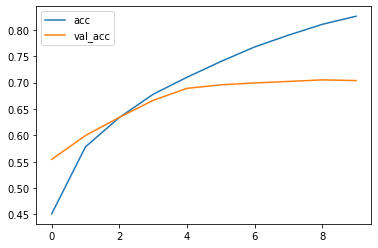

In [16]:
# Plot accuracy per iteration
plt.plot(result.history['acc'], label='acc')
plt.plot(result.history['val_acc'], label='val_acc')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be appled by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("normalized confusion matrix")
  else:
    print('Consusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label mapping


In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
temp_idx = np.random.choice(misclassified_idx)
plt.imshow(x_test[temp_idx]) # 원래 쉐입과 동일해서 reshape해주지 않아도 됨
plt.title('True label: %s, Predicted label: %s' % (labels[y_test[temp_idx]], labels[p_test[temp_idx]]))

In [ ]:
# Now that the model is so large, it's useful to summarie it
